<a href="https://colab.research.google.com/github/basharataly/nyu-python-public-policy/blob/master/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import statsmodels.api as sm
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
id=pd.read_csv('https://planninglabs.carto.com/api/v2/sql?format=csv&q=SELECT%20cartodb_id,the_geom,the_geom_webmercator,acres,acs_tooltip,acs_tooltip_2,acs_tooltip_3,area_sqmi,borocd,cb_email,cb_website,cd_full_title,cd_short_title,cd_son_fy2018,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_count,crime_count_boro,crime_count_nyc,crime_per_1000,crime_per_1000_boro,crime_per_1000_nyc,female_10_14,female_15_19,female_20_24,female_25_29,female_30_34,female_35_39,female_40_44,female_45_49,female_5_9,female_50_54,female_55_59,female_60_64,female_65_69,female_70_74,female_75_79,female_80_84,female_85_over,female_under_5,fp_100_area,fp_100_bldg,fp_100_cost_burden,fp_100_cost_burden_value,fp_100_mhhi,fp_100_mortg_value,fp_100_openspace,fp_100_ownerocc,fp_100_ownerocc_value,fp_100_permortg,fp_100_pop,fp_100_rent_burden,fp_100_rent_burden_value,fp_100_resunits,fp_500_area,fp_500_bldg,fp_500_cost_burden,fp_500_cost_burden_value,fp_500_mhhi,fp_500_mortg_value,fp_500_openspace,fp_500_ownerocc,fp_500_ownerocc_value,fp_500_permortg,fp_500_pop,fp_500_rent_burden,fp_500_rent_burden_value,fp_500_resunits,lep_rate,lep_rate_boro,lep_rate_nyc,lot_area_commercial_office,lot_area_industrial_manufacturing,lot_area_mixed_use,lot_area_open_space,lot_area_other_no_data,lot_area_parking,lot_area_public_facility_institution,lot_area_res_1_2_family_bldg,lot_area_res_multifamily_elevator,lot_area_res_multifamily_walkup,lot_area_transportation_utility,lot_area_vacant,lots_commercial_office,lots_industrial_manufacturing,lots_mixed_use,lots_open_space,lots_other_no_data,lots_parking,lots_public_facility_institution,lots_res_1_2_family_bldg,lots_res_multifamily_elevator,lots_res_multifamily_walkup,lots_total,lots_transportation_utility,lots_vacant,male_10_14,male_15_19,male_20_24,male_25_29,male_30_34,male_35_39,male_40_44,male_45_49,male_5_9,male_50_54,male_55_59,male_60_64,male_65_69,male_70_74,male_75_79,male_80_84,male_85_over,male_under_5,mean_commute,mean_commute_boro,mean_commute_nyc,moe_bach_deg,moe_bach_deg_boro,moe_bach_deg_nyc,moe_foreign_born,moe_hh_rent_burd,moe_hh_rent_burd_boro,moe_hh_rent_burd_nyc,moe_lep_rate,moe_lep_rate_boro,moe_lep_rate_nyc,moe_mean_commute,moe_mean_commute_boro,moe_mean_commute_nyc,moe_over65_rate,moe_over65_rate_boro,moe_over65_rate_nyc,moe_poverty_rate,moe_under18_rate,moe_under18_rate_boro,moe_under18_rate_nyc,moe_unemnployment,moe_unemployment_boro,moe_unemployment_cd,neighborhoods,over65_rate,over65_rate_boro,over65_rate_nyc,pct_asian_nh,pct_bach_deg,pct_bach_deg_boro,pct_bach_deg_nyc,pct_black_nh,pct_clean_strts,pct_clean_strts_boro,pct_clean_strts_nyc,pct_foreign_born,pct_hh_rent_burd,pct_hh_rent_burd_boro,pct_hh_rent_burd_nyc,pct_hispanic,pct_other_nh,pct_served_parks,pct_white_nh,pop_2000,pop_2010,pop_acs,pop_change_00_10,poverty_rate,poverty_rate_boro,poverty_rate_nyc,puma,shared_puma,shared_puma_cd,son_issue_1,son_issue_2,son_issue_3,total_lot_area,under18_rate,under18_rate_boro,under18_rate_nyc,unemployment_boro,unemployment_cd,unemployment_nyc%20FROM%20community_district_profiles&filename=indicators.csv', header='infer')

In [4]:
id.head()

,the_geom,lots_parking,the_geom_webmercator,acres,acs_tooltip,acs_tooltip_2,acs_tooltip_3,area_sqmi,borocd,cb_email,cb_website,cd_full_title,cd_short_title,cd_son_fy2018,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_count,crime_count_boro,crime_count_nyc,crime_per_1000,crime_per_1000_boro,crime_per_1000_nyc,female_10_14,female_15_19,female_20_24,female_25_29,female_30_34,female_35_39,female_40_44,female_45_49,female_5_9,female_50_54,female_55_59,female_60_64,female_65_69,female_70_74,female_75_79,female_80_84,female_85_over,female_under_5,fp_100_area,fp_100_bldg,fp_100_cost_burden,fp_100_cost_burden_value,fp_100_mhhi,fp_100_mortg_value,fp_100_openspace,fp_100_ownerocc,fp_100_ownerocc_value,fp_100_permortg,fp_100_pop,fp_100_rent_burden,fp_100_rent_burden_value,fp_100_resunits,fp_500_area,fp_500_bldg,fp_500_cost_burden,fp_500_cost_burden_value,fp_500_mhhi,fp_500_mortg_value,fp_500_openspace,fp_500_ownerocc,fp_500_ownerocc_value,fp_500_permortg,fp_500_pop,fp_500_rent_burden,fp_500_rent_burden_value,fp_500_resunits,lep_rate,lep_rate_boro,lep_rate_nyc,lot_area_commercial_office,lot_area_industrial_manufacturing,lot_area_mixed_use,lot_area_open_space,lot_area_other_no_data,lot_area_parking,lot_area_public_facility_institution,lot_area_res_1_2_family_bldg,lot_area_res_multifamily_elevator,lot_area_res_multifamily_walkup,lot_area_transportation_utility,lot_area_vacant,lots_commercial_office,lots_industrial_manufacturing,lots_mixed_use,lots_open_space,lots_other_no_data,cartodb_id,lots_public_facility_institution,lots_res_1_2_family_bldg,lots_res_multifamily_elevator,lots_res_multifamily_walkup,lots_total,lots_transportation_utility,lots_vacant,male_10_14,male_15_19,male_20_24,male_25_29,male_30_34,male_35_39,male_40_44,male_45_49,male_5_9,male_50_54,male_55_59,male_60_64,male_65_69,male_70_74,male_75_79,male_80_84,male_85_over,male_under_5,mean_commute,mean_commute_boro,mean_commute_nyc,moe_bach_deg,moe_bach_deg_boro,moe_bach_deg_nyc,moe_foreign_born,moe_hh_rent_burd,moe_hh_rent_burd_boro,moe_hh_rent_burd_nyc,moe_lep_rate,moe_lep_rate_boro,moe_lep_rate_nyc,moe_mean_commute,moe_mean_commute_boro,moe_mean_commute_nyc,moe_over65_rate,moe_over65_rate_boro,moe_over65_rate_nyc,moe_poverty_rate,moe_under18_rate,moe_under18_rate_boro,moe_under18_rate_nyc,moe_unemnployment,moe_unemployment_boro,moe_unemployment_cd,neighborhoods,over65_rate,over65_rate_boro,over65_rate_nyc,pct_asian_nh,pct_bach_deg,pct_bach_deg_boro,pct_bach_deg_nyc,pct_black_nh,pct_clean_strts,pct_clean_strts_boro,pct_clean_strts_nyc,pct_foreign_born,pct_hh_rent_burd,pct_hh_rent_burd_boro,pct_hh_rent_burd_nyc,pct_hispanic,pct_other_nh,pct_served_parks,pct_white_nh,pop_2000,pop_2010,pop_acs,pop_change_00_10,poverty_rate,poverty_rate_boro,poverty_rate_nyc,puma,shared_puma,shared_puma_cd,son_issue_1,son_issue_2,son_issue_3,total_lot_area,under18_rate,under18_rate_boro,under18_rate_nyc,unemployment_boro,unemployment_cd,unemployment_nyc
0,NaN,23,NaN,976.3,American Community Survey 2013-2017 5-Year Est...,American Community Survey (ACS) 2013-2017 5-ye...,2010 Census population counts for floodplain a...,1.5,101,man01@cb.nyc.gov,www1.nyc.gov/site/manhattancb1/index.page,Manhattan Community District 1,Manhattan CD 1,http://www1.nyc.gov/assets/planning/download/p...,1729,39547,7,1,28,22,1099,25961,96515,15.634252,15.7,11.8,1.1,2.4,4.2,7.3,6.6,4.7,3.5,2.9,1.8,2.2,2.3,2.5,2.3,1.7,1.0,0.7,1.1,2.6,1.78,678,0.284774,2164,121000.0,4900,0.041,0.220593,7599,0.644822,16733,0.353232,7367,19061,2.53,1036,0.284528,2913,118000.0,6272,0.042,0.241982,10238,0.612620,29221,0.350056,8750,28097,5.8,15.5,23.1,7865158,252207,4271043,1453796,5345624,433550,10274554,45535,1746495,185913,4107387,134060,343,78,578,25,11,1,69,33,167,65,1448,33,23,1.4,1.9,2.5,6.0,6.7,5.7,3.7,3.3,1.7,2.8,2.5,2.7,1.9,1.2,0.8,0.7,0.7,2.9,25.2,31.8,40.8,1.0,0.3,0.2,1.1,1.6,0.5,0.3,0.6,0.3,0.1,0.5,0.2,0.1,0.7,0.1,0.1,0.7,0.6,0.1,0.1,0.1,0.2,0.3,"Battery Park City, Civic Center, 

step 3: My hypothesis is that more male population in the ages 15-19 will mean more residential noise complaints as at these ages groups  like to go out more and result in more noises. 

In [19]:
id2 = id.filter(['borocd','male_15_19'], axis=1)
id2.head()

,borocd,male_15_19
0,101,1.9
1,102,1.9
2,103,2.6
3,104,1.0
4,105,1.0


In [0]:
df_new= df['complaint_type'][df['complaint_type']== 'Noise - Residential']
df2=df[df['complaint_type'].isin(df_new)]


In [8]:
df2.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
2,2,2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
11,11,11,39883376,08/01/2018 12:04:41 AM,08/01/2018 03:38:54 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10456,1041 FINDLAY AVENUE,FINDLAY AVENUE,EAST 165 STREET,EAST 166 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,08/01/2018 08:04:41 AM,The Police Department responded to the complai...,08/01/2018 03:38:54 AM,04 BRONX,2.024330e+09,BRONX,1007930.0,241405.0,PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.829245,-73.914433,"(40.829244677725754, -73.91443331831667)",204.0
16,16,16,39886233,08/01/2018 12:06:29 AM,08/01/2018 02:54:24 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11693,82-01 BEACH CHANNEL DRIVE,BEACH CHANNEL DRIVE,BEACH 81 STREET,BEACH 83 STREET,NaN,NaN,ADDRESS,FAR ROCKAWAY,NaN,Precinct,Closed,08/01/2018 08:06:29 AM,The Police Department responded to the complai...,08/01/2018 02:54:24 AM,14 QUEENS,4.161140e+09,QUEENS,1037327.0,154262.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.589931,-73.808896,"(40.58993080750793, -73.80889570815852)",414.0
17,17,17,39881426,08/01/2018 12:06:42 AM,08/01/2018 04:00:03 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10457,1654 MONROE AVENUE,MONROE AVENUE,EAST MT EDEN AVENUE,EAST 173 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,08/01/2018 08:06:42 AM,The Police Department responded to the complai...,08/01/2018 04:00:03 AM,04 BRONX,2.027910e+09,BRONX,1010037.0,246441.0,PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843061,-73.906800,"(40.84306113235555, -73.90680040695833)",204.0
18,18,18,39880309,08/01/2018 12:06:51 AM,08/01/2018 04:54:26 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,64 HERKIMER STREET,HERKIMER STREET,BEDFORD AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:06:51 AM,The Police Department responded to the complai...,08/01/2018 04:54:26 AM,03 BROOKLYN,3.018650e+09,BROOKLYN,997776.0,186919.0,PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.679716,-73.951234,"(40.67971590505359, -73.95123396494363)",303.0


In [0]:
df2_new= df2.groupby(['borocd', 'complaint_type']).size().reset_index(name='count_of_311_requests')

In [10]:
df2_new.head()

,borocd,complaint_type,count_of_311_requests
0,101.0,Noise - Residential,722
1,102.0,Noise - Residential,1837
2,103.0,Noise - Residential,6272
3,104.0,Noise - Residential,2702
4,105.0,Noise - Residential,741


In [11]:

merged_data = pd.merge(left=id2, right=df2_new,left_on='borocd', right_on='borocd')
merged_data.head()

,borocd,male_15_19,complaint_type,count_of_311_requests
0,101,1.9,Noise - Residential,722
1,102,1.9,Noise - Residential,1837
2,103,2.6,Noise - Residential,6272
3,104,1.0,Noise - Residential,2702
4,105,1.0,Noise - Residential,741


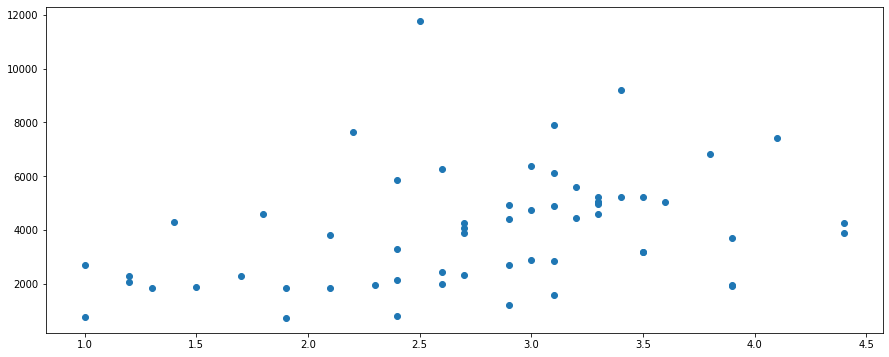

In [12]:
plt.figure(figsize=(15, 6))
plt.scatter(merged_data.male_15_19, merged_data.count_of_311_requests)
plt.show()

In [16]:

y = np.array(merged_data.count_of_311_requests)
x = np.array(merged_data['male_15_19'])
x = sm.add_constant(x)

print(x)

model = sm.OLS(y, x).fit()

print(model.summary())

[[1.  1.9]
 [1.  1.9]
 [1.  2.6]
 [1.  1. ]
 [1.  1. ]
 [1.  1.2]
 [1.  1.4]
 [1.  1.2]
 [1.  3.3]
 [1.  2.2]
 [1.  3.3]
 [1.  2.5]
 [1.  3.9]
 [1.  3.9]
 [1.  4.4]
 [1.  4.1]
 [1.  3.8]
 [1.  4.4]
 [1.  3.4]
 [1.  2.9]
 [1.  3.3]
 [1.  2.7]
 [1.  3.5]
 [1.  3.2]
 [1.  2.4]
 [1.  2.1]
 [1.  3.1]
 [1.  3. ]
 [1.  3.4]
 [1.  1.5]
 [1.  2.3]
 [1.  2.7]
 [1.  2.7]
 [1.  2.1]
 [1.  2.6]
 [1.  3.9]
 [1.  2.4]
 [1.  3.1]
 [1.  2.6]
 [1.  3.5]
 [1.  3. ]
 [1.  3.5]
 [1.  1.8]
 [1.  1.7]
 [1.  2.7]
 [1.  2.9]
 [1.  2.9]
 [1.  1.3]
 [1.  2.4]
 [1.  3.2]
 [1.  3.3]
 [1.  3.3]
 [1.  2.4]
 [1.  3.1]
 [1.  3. ]
 [1.  3.1]
 [1.  3.6]
 [1.  3.1]
 [1.  2.9]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     8.121
Date:                Sat, 14 Dec 2

In [17]:

p = model.params
print('parameters:', p)

r2 = model.rsquared
print('R2:', r2)

label = 'y = ' + str(round(p[1],2)) + 'x + ' + str(round(p[0],2)) + '; R2 = ' + str(round(r2,3))
print(label)

parameters: [1430.84999874  925.12744544]
R2: 0.124703826832117
y = 925.13x + 1430.85; R2 = 0.125


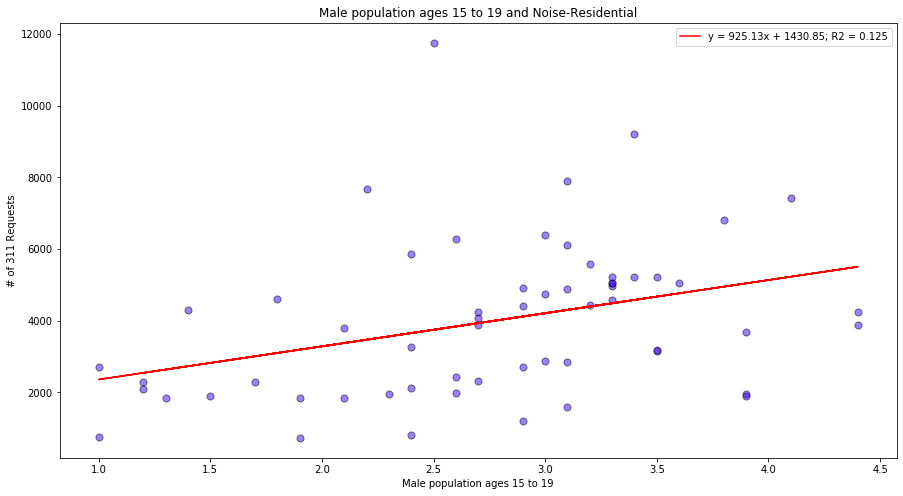

In [18]:

x_dummy = np.array(merged_data['male_15_19'])

plt.figure(figsize=(15, 8))

plt.scatter(
    np.array(merged_data['male_15_19']), # x
    np.array(merged_data.count_of_311_requests), # y
    s=50, 
    c='#3d03fc', 
    edgecolors='black', 
    alpha=0.5) 

plt.plot(
    x_dummy, 
    p[0] + p[1] * x_dummy,
    c='r',
    label=label)

plt.title('Male population ages 15 to 19 and Noise-Residential')
plt.xlabel('Male population ages 15 to 19')
plt.ylabel('# of 311 Requests')
plt.legend()

plt.show()

Step 9: The OLS and the line of best-fit show a meaningful relationship between the number of 311 requests for residential noise and percentage of male population between ages 15-19. Also, the p-value for the t-stat is significant at 95% significant level. The t-stat value is also very large around 925 which means that for each additional percentage increase in male population in ages 15-19, the residential noise complaints increase by almost 925. 